# Emotion detection


**emporting library**

In [1]:
from matplotlib import pyplot as plt
from glob import glob
import cv2
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version",tf.__version__)




2024-06-25 18:52:03.690381: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 18:52:03.690507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 18:52:03.812169: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Tensorflow version 2.15.0


**Exploring dataset**

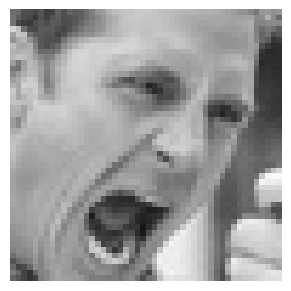

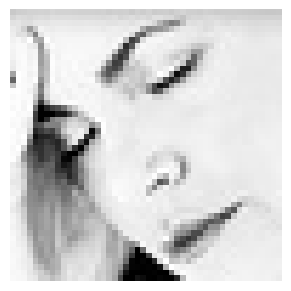

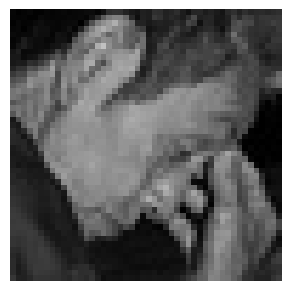

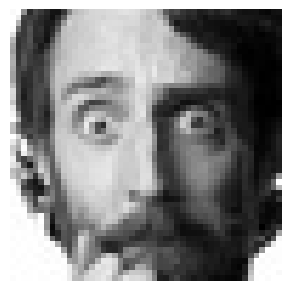

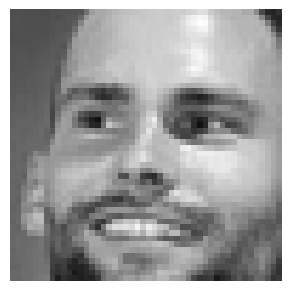

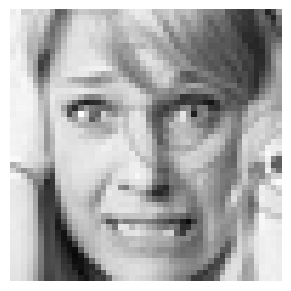

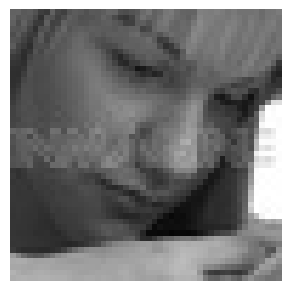

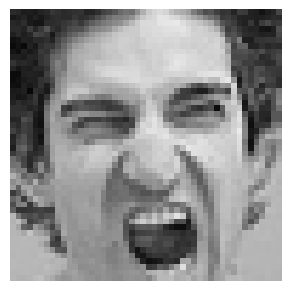

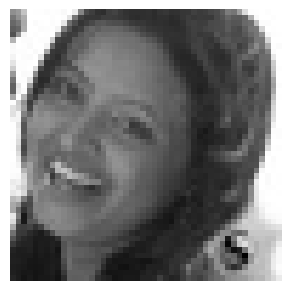

In [3]:
images=glob("/kaggle/input/fer2013/train/**/**")
for i in range(9):
  image=random.choice(images)
  plt.figure(figsize=(12,12))
  plt.subplot(331+i)
  plt.imshow(cv2.imread(image))
  plt.axis("off")

**prepocessing Data**

In [4]:
img_size= 48
batch_size =64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("/kaggle/input/fer2013/train/",target_size=(img_size,img_size),
                                                  color_mode="grayscale",batch_size=batch_size,class_mode="categorical",shuffle=True)

datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_validation.flow_from_directory("/kaggle/input/fer2013/test/",target_size=(img_size,img_size),
                                                  color_mode="grayscale",batch_size=batch_size,class_mode="categorical",shuffle=True)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [5]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    return x


In [6]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.25)(x)
    return x

In [9]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    
    # Convolutional layers
    conv_1 = Convolution(inputs, 64, (3, 3))
    conv_2 = Convolution(conv_1, 128, (5, 5))
    conv_3 = Convolution(conv_2, 512, (3, 3))
    conv_4 = Convolution(conv_2, 512, (3, 3))
    
    # Flatten layer
    flatten = Flatten()(conv_4)
    
    # Dense layers
    dense_1 = Dense_f(flatten, 256)
    dense_2 = Dense_f(dense_1, 512)
    output = Dense(7, activation='softmax')(dense_2)
    
    # Create and compile the model
    model = Model(inputs=inputs, outputs=output)
    opt= Adam(learning_rate=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [10]:

model = model_fer((48, 48, 1))
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,655,815 (21.58 MB)

 Trainable params: 5,652,871 (21.56 MB)

 Non-trainable params: 2,944 (11.50 KB)

**Initializing the model**

In [11]:
epochs= 15
steps_per_epoch= train_generator.n//train_generator.batch_size
validation_steps= validation_generator.n//validation_generator.batch_size

checkpoint= ModelCheckpoint('model_weights.weights.h5',monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)
reduce_lr=ReduceLROnPlateau(monitor="val_loss",factor=0.1,patience=2, min_lr=0.00001)
callbacks= [checkpoint,reduce_lr]

# Training the Model

In [12]:
history= model.fit(x= train_generator,
                   steps_per_epoch=steps_per_epoch,
                   epochs=epochs,
                   validation_data= validation_generator,
                   validation_steps=validation_steps,
                   callbacks=callbacks)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:45:09 14s/step - accuracy: 0.2031 - loss: 2.2417

I0000 00:00:1719341903.806814     123 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


446/448 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.3241 - loss: 1.8118
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 182s 374ms/step - accuracy: 0.3245 - loss: 1.8107 - val_accuracy: 0.4328 - val_loss: 1.4540 - learning_rate: 5.0000e-04
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6406 - loss: 1.0433

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6406 - loss: 1.0433 - val_accuracy: 0.4000 - val_loss: 1.0245 - learning_rate: 5.0000e-04
Epoch 3/15
446/448 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4869 - loss: 1.3400
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 0.4870 - loss: 1.3399 - val_accuracy: 0.5269 - val_loss: 1.2363 - learning_rate: 5.0000e-04
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4688 - loss: 1.3704
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.4688 - loss: 1.3704 - val_accuracy: 0.5000 - val_loss: 1.5179 - learning_rate: 5.0000e-04
Epoch 5/15
447/448 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5583 - loss: 1.1661
Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.5584 - loss: 1.1660 - val_accuracy: 0.5709

**Model Evalution**

In [13]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.5782 - loss: 1.0983


[1.084886908531189, 0.5873502492904663]

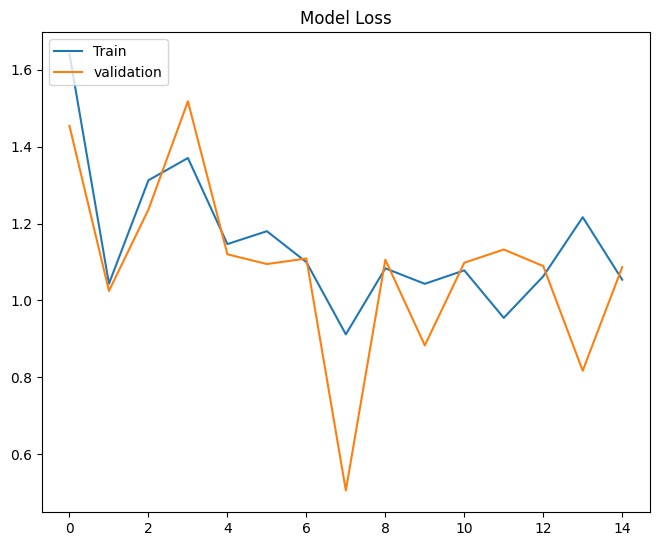

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

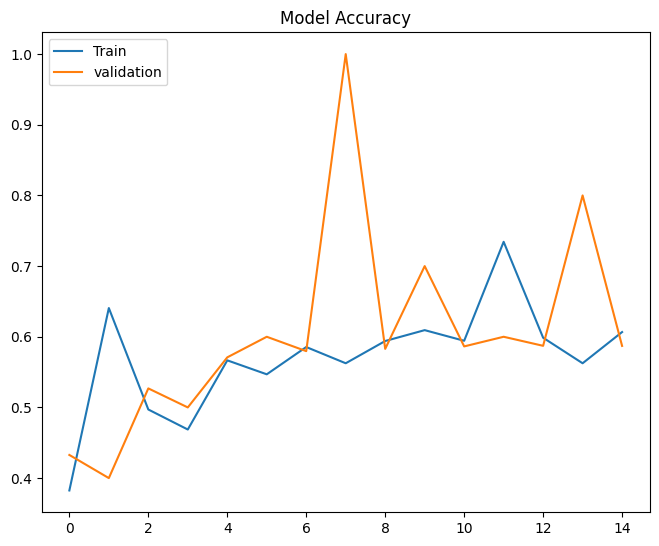

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [16]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
  json_file.write(model_json)